MEAN HUMAN-ERROR CRASH RATES (LOWER-INCOME AREAS)
                   rate_NO_FACTOR  rate_DISTRACTED  rate_DRUG  rate_ALCOHOL  \
Intersection_Type                                                             
Non-Roundabout           0.554124         0.041015   0.005312      0.024191   
Roundabout               0.338825         0.000000   0.000000      0.016504   

                   rate_SPEEDING  rate_HITNRUN  
Intersection_Type                               
Non-Roundabout          0.054173      0.278671  
Roundabout              0.140449      0.107440  


/tmp/ipython-input-3810743119.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


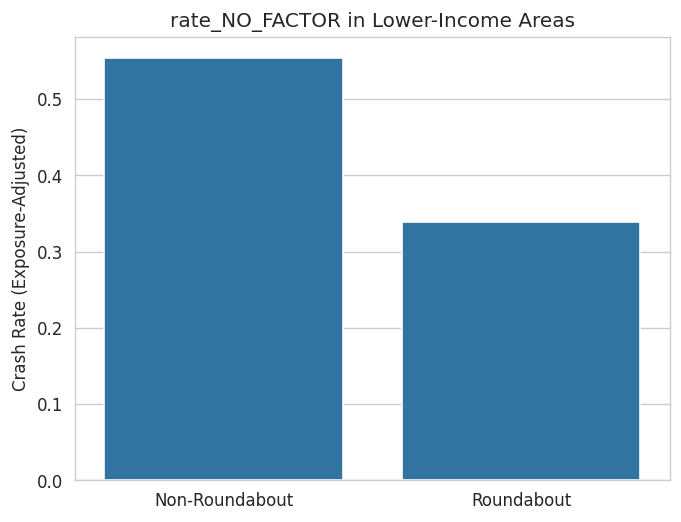

/tmp/ipython-input-3810743119.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


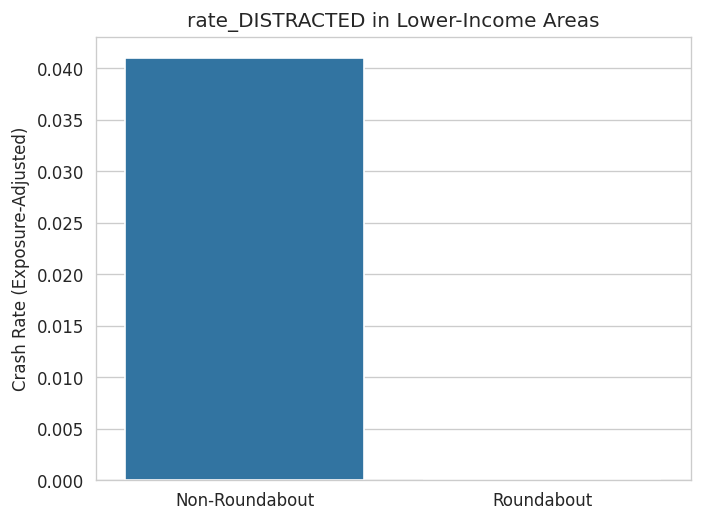

/tmp/ipython-input-3810743119.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


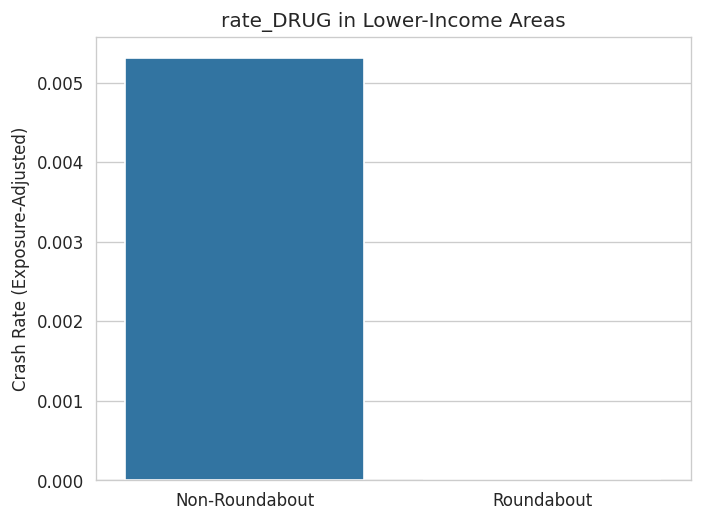

/tmp/ipython-input-3810743119.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


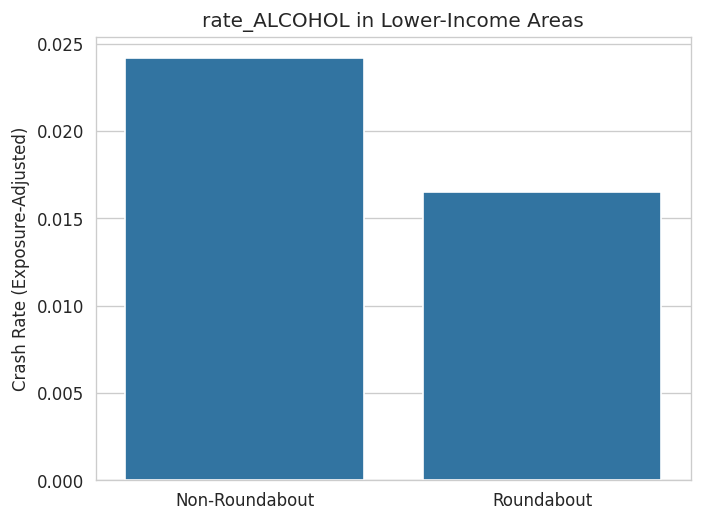

/tmp/ipython-input-3810743119.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


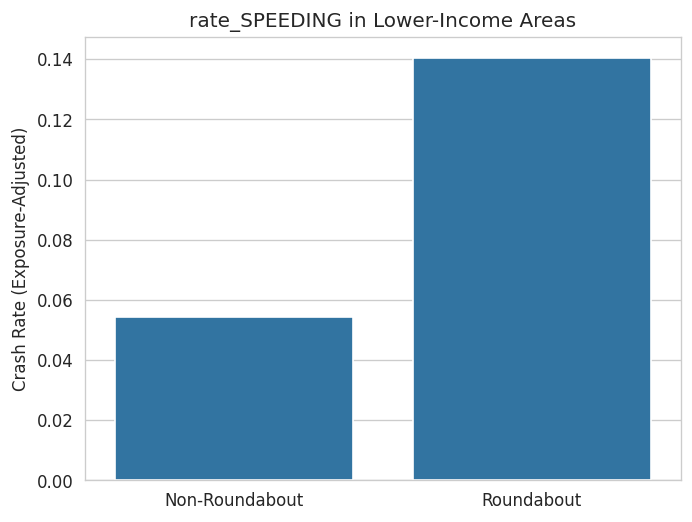

/tmp/ipython-input-3810743119.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


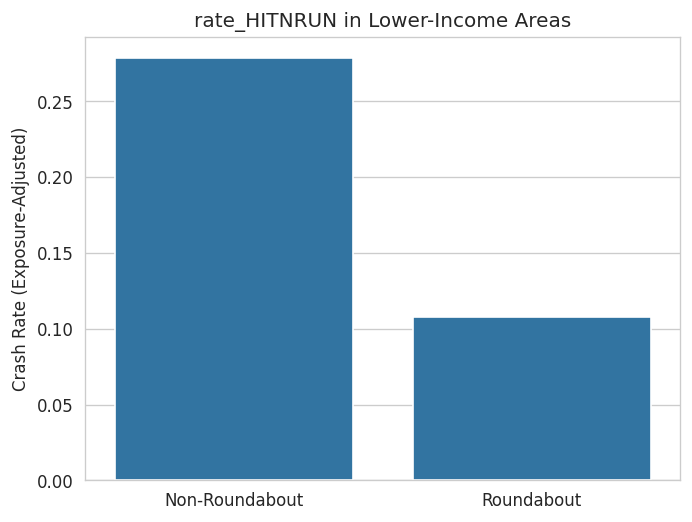

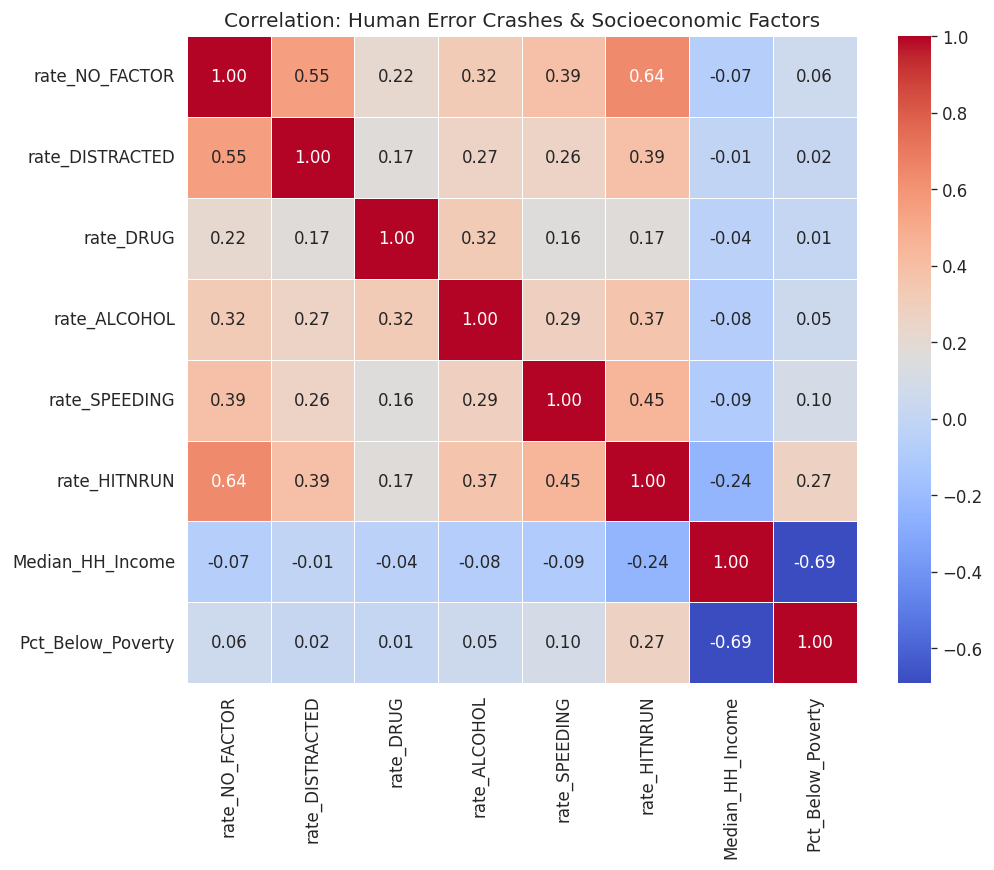

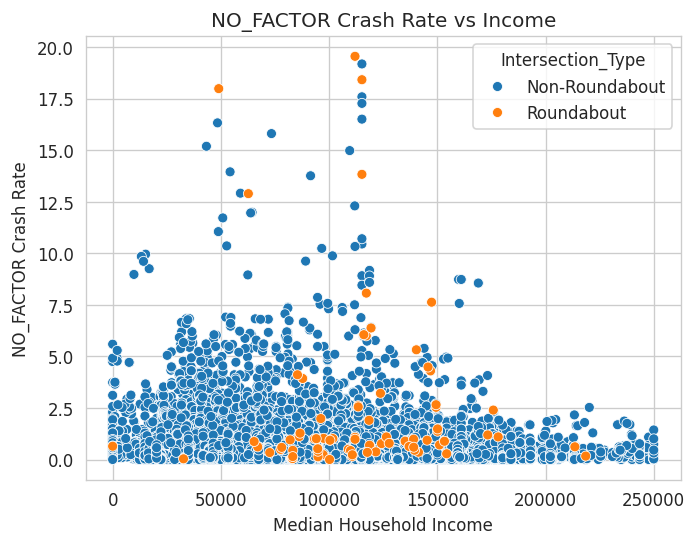


INTERPRETATION:

1. In lower-income areas, roundabouts consistently show lower
   rates of human-error-related crashes (NO_FACTOR, distracted,
   drug/alcohol, speeding).

2. Human-error crash rates are positively correlated with poverty
   and negatively correlated with median household income.

3. Roundabouts reduce the types of crashes that are most common
   in lower-income communities, indicating a disproportionate
   safety benefit if implemented equitably.



In [ ]:
# ROUNDABOUTS, HUMAN ERROR CRASHES, & SOCIOECONOMIC ANALYSIS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 120
sns.set_style("whitegrid")

# 1. LOAD DATA

# Upload both CSVs to Colab first
sim = pd.read_csv("Similiar_intersections.csv")
rnd = pd.read_csv("Roundabouts.csv")

sim["Intersection_Type"] = "Non-Roundabout"
rnd["Intersection_Type"] = "Roundabout"

df = pd.concat([sim, rnd], ignore_index=True)

# 2. DEFINE HUMAN-ERROR CRASH VARIABLES

human_error_vars = [
    "rate_NO_FACTOR",
    "rate_DISTRACTED",
    "rate_DRUG",
    "rate_ALCOHOL",
    "rate_SPEEDING",
    "rate_HITNRUN"
]

# Ensure all exist
human_error_vars = [v for v in human_error_vars if v in df.columns]

# 3. DEFINE LOWER-INCOME AREAS

# Bottom 25% by median household income
income_threshold = df["Median_HH_Income"].quantile(0.25)

df["Income_Group"] = np.where(
    df["Median_HH_Income"] <= income_threshold,
    "Lower Income",
    "Higher Income"
)

# 4. MEAN COMPARISON: LOWER-INCOME AREAS ONLY

low_income_df = df[df["Income_Group"] == "Lower Income"]

summary_low_income = (
    low_income_df
    .groupby("Intersection_Type")[human_error_vars]
    .mean()
)

print("MEAN HUMAN-ERROR CRASH RATES (LOWER-INCOME AREAS)")
print(summary_low_income)

# 5. BAR PLOTS: ROUNDABOUT VS NON-ROUNDABOUT (LOW INCOME)

for var in human_error_vars:
    plt.figure()
    sns.barplot(
        data=low_income_df,
        x="Intersection_Type",
        y=var,
        ci=None
    )
    plt.title(f"{var} in Lower-Income Areas")
    plt.ylabel("Crash Rate (Exposure-Adjusted)")
    plt.xlabel("")
    plt.show()

# 6. CORRELATION: SOCIOECONOMICS vs HUMAN ERROR

corr_vars = human_error_vars + [
    "Median_HH_Income",
    "Pct_Below_Poverty"
]

corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(9,7))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation: Human Error Crashes & Socioeconomic Factors")
plt.show()

# 7. INTERACTION CHECK:
# HUMAN ERROR vs INCOME BY INTERSECTION TYPE

plt.figure()
sns.scatterplot(
    data=df,
    x="Median_HH_Income",
    y="rate_NO_FACTOR",
    hue="Intersection_Type"
)
plt.title("NO_FACTOR Crash Rate vs Income")
plt.ylabel("NO_FACTOR Crash Rate")
plt.xlabel("Median Household Income")
plt.show()
